In [13]:
!pip install kaggle
import os

In [14]:
import pandas as pd
d = pd.read_csv('stock_data.csv')


In [15]:
!pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.8 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 3.6 MB/s eta 0:00:00


In [16]:
!pip install scikit-learn
!pip install chart-studio
!pip install --upgrade mplfinance

In [17]:
# Machine learning classification libraries

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier

#from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score

# For data manipulation

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn

# Train Test Split

from sklearn.model_selection import train_test_split

In [18]:
#Print the data
d

,index,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE(mn),VOLUME
0,0,12/1/2020,GP,6.1,6.3,6.1,6.2,6.1,6.2,304,9.311,"1,503,031"
1,1,11/30/2020,GP,6.2,6.5,6.1,6.5,6.2,6.4,539,16.332,"2,617,333"
2,2,11/29/2020,GP,6.4,6.7,6.3,6.5,6.4,6.5,453,19.140,"2,953,085"
3,3,11/26/2020,GP,6.5,6.7,6.3,6.5,6.5,6.3,497,22.492,"3,467,374"
4,4,11/25/2020,GP,6.3,6.7,6.2,6.7,6.3,6.6,576,26.917,"4,201,219"
...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2766,6/25/2020,ACFL,0.0,0.0,0.0,0.0,18.6,18.6,0,0.000,0
2767,2767,6/24/2020,ACFL,0.0,0.0,0.0,0.0,18.6,18.6,0,0.000,0
2768,2768,6/23/2020,ACFL,0.0,0.0,0.0,0.0,18.6,18.6,0,0.000,0
2769,2769,6/22/2020,ACFL,0.0,0.0,0.0,0.0,18.6,18.6,0,0.000,0


In [19]:
d.head()

# get the names of the columns

d.columns

Index(['index', 'DATE', 'TRADING CODE', 'LTP', 'HIGH', 'LOW', 'OPENP',
       'CLOSEP', 'YCP', 'TRADE', 'VALUE(mn)', 'VOLUME'],
      dtype='object')

In [20]:
# strip the blank spaces from column names

d.rename(columns=lambda x: x.strip(), inplace=True)

In [21]:
d.describe()

# clear the instrument names

d['TRADING CODE']=d['TRADING CODE'].str.strip()

In [22]:
d['TRADING CODE'].value_counts()

TRADING CODE
GP            443
1STPRIMFMF    443
AAMRANET      443
AAMRATECH     443
ABB1STMF      443
ABBANK        443
ACFL          113
Name: count, dtype: int64

In [23]:
# select the desired instrument and sor the data according to closing prices (ascending order)

da=d[(d['TRADING CODE']=='GP')].sort_values('DATE',
ascending=False).reset_index(drop=True)

da=da[da['TRADE']!=0]

Text(0.5, 1.0, 'Time Series Plot of GP')

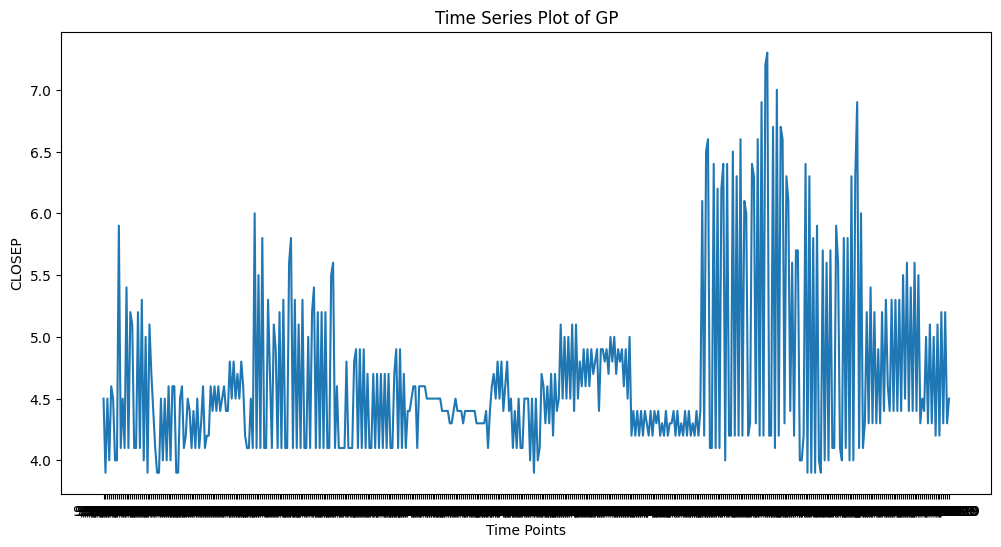

In [24]:
da.head()

# draw a time series plot

plt.figure(figsize=(12,6))

plt.plot(da['DATE'], da['CLOSEP'])

plt.xlabel('Time Points')

plt.ylabel('CLOSEP')

plt.title('Time Series Plot of '+da.loc[1, 'TRADING CODE'])


In [25]:
# Draw the Candlestick plot

import chart_studio.plotly as py

import plotly.graph_objs as go

from datetime import datetime

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot


In [26]:
!pip install mplfinance

In [27]:
init_notebook_mode(connected=True)

trace = go.Candlestick(x=da['DATE'],

              open=da['OPENP'],

              high=da['HIGH'],

              low=da['LOW'],

              close=da['CLOSEP'])



dat=[trace]

iplot(dat)
# Candlestick chart with matplotlib

#from matplotlib.finance import candlestick_ohlc

#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

import matplotlib.dates as mdates

# Converting date to pandas datetime format

da['DATE'] = pd.to_datetime(da['DATE'])

da['DATE'] = da['DATE'].apply(mdates.date2num)

ohlc= da[['DATE', 'OPENP', 'HIGH', 'LOW','CLOSEP']]

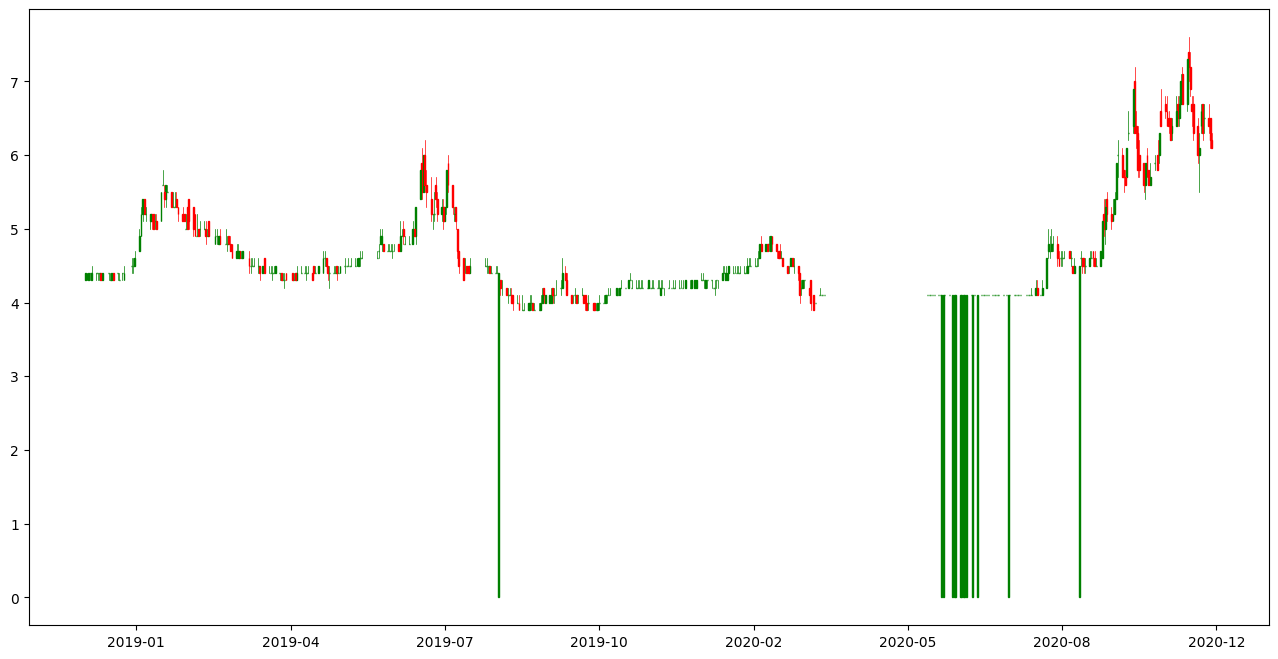

In [28]:
f1, ax = plt.subplots(figsize = (16,8))

candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

In [29]:
# Create the features

# we believe that today's CLOSEP-OPENP and HIGH-LOW affect tomorrow's CLOSEP

da['HIGH-LOW']=da['HIGH']-da['LOW']

da['CLOSEP-OPENP']=da['CLOSEP']-da['OPENP']

Text(0.5, 1.0, 'Histogram of CLOSEP-OPENP')

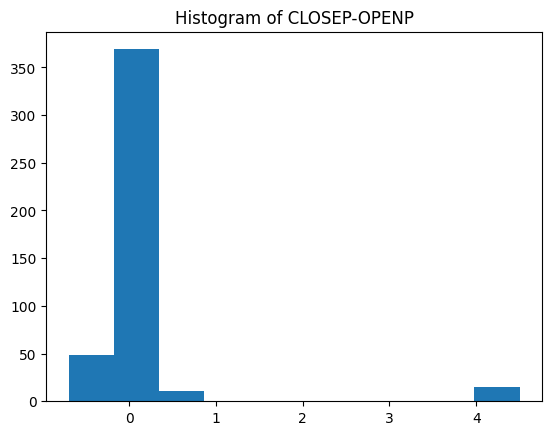

In [30]:
# check the distribution of the features

plt.hist(da['CLOSEP-OPENP'])

plt.title('Histogram of CLOSEP-OPENP')



Text(0.5, 1.0, 'Histogram of HIGH-LOW')

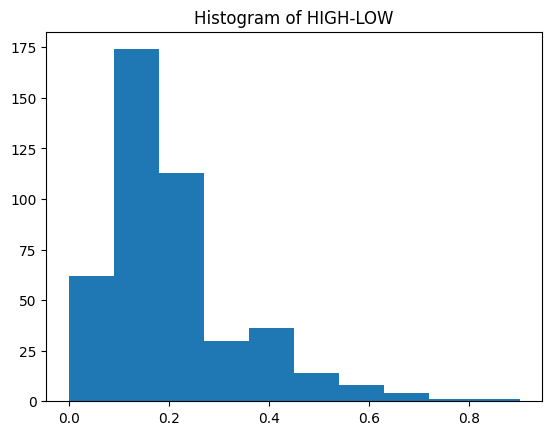

In [31]:
plt.hist(da['HIGH-LOW'])

plt.title('Histogram of HIGH-LOW')


#Text(0.5, 1.0, 'Histogram of HIGH-LOW')

In [32]:
da.head()

print(da.shape)

(443, 14)


In [33]:
da['CLOSEP']=da['CLOSEP'].astype('float64')

# create the return series of CLOSEP

da['Y']=da['CLOSEP'][1:]/da['CLOSEP'][:-1].values-1


In [34]:
da.head()

,index,DATE,TRADING CODE,LTP,HIGH,LOW,OPENP,CLOSEP,YCP,TRADE,VALUE(mn),VOLUME,HIGH-LOW,CLOSEP-OPENP,Y
0,58,18514.0,GP,4.5,4.6,4.4,4.6,4.5,4.5,91,1.363,"302,992",0.2,-0.1,NaN
1,263,18148.0,GP,3.9,4.1,3.9,4.0,3.9,4.0,91,1.966,"492,019",0.2,-0.1,-0.133333
2,59,18513.0,GP,4.6,4.6,4.4,4.6,4.5,4.6,136,6.872,"1,523,449",0.2,-0.1,0.153846
3,264,18147.0,GP,4.1,4.1,4.0,4.0,4.0,4.0,35,0.993,"247,662",0.1,0.0,-0.111111
4,60,18512.0,GP,4.6,4.7,4.5,4.6,4.6,4.5,105,5.216,"1,132,828",0.2,0.0,0.150000


Text(0, 0.5, 'Count')

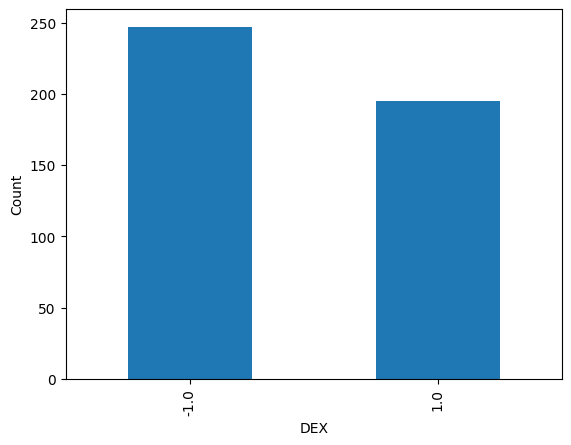

In [35]:
# if todays CLOSEP is greater than yesterday's CLOSEP, 1, else -1

da.loc[da['Y']>0, 'DEX']=1

da.loc[da['Y']<=0, 'DEX']=-1

# we shifted the values of DEX up one step for the sake of model fitting, i.e tomorrow's DEX is inline with today's features

da['DEX']=da['DEX'].shift(-1)

da.head()

da.tail()

# bar plot of the Target variable

da.groupby(['DEX'])['CLOSEP'].count().plot(kind='bar')

plt.ylabel('Count')

In [36]:
# remove the rows with missing values

da=da.dropna()

In [37]:
y=da['DEX']

X=da[['CLOSEP-OPENP', 'HIGH-LOW']]

In [38]:
# set the train set size

pc=.90

j=int(pc*len(da['DEX']))

In [39]:
# train test split of features

X_train=X[:j]

X_test=X[j:]

In [40]:
# train test split of target variable

y_train=y[:j]

y_test=y[j:]

In [41]:
# set the Support vector classifier model

dex=SVC().fit(X_train, y_train)


In [42]:
# predict the test set values

y_pred=dex.predict(X_test)

len(y_pred)

y_pred

array([-1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1.,  1., -1.,  1., -1., -1.])

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[21,  1],
       [ 9, 14]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -1.0       0.70      0.95      0.81        22
         1.0       0.93      0.61      0.74        23

    accuracy                           0.78        45
   macro avg       0.82      0.78      0.77        45
weighted avg       0.82      0.78      0.77        45



In [45]:
# get the confusion matrix for train set

y_p=dex.predict(X_train)

confusion_matrix(y_train,y_p )


array([[145,  79],
       [ 61, 111]], dtype=int64)

In [46]:
ac=accuracy_score(y_test, y_pred)

bc=accuracy_score(y_train, y_p)

print('The accuracy of the SVC Model in Test Set is: %.3f' % (ac))

print('The accuracy of the SVC Model in Train Set is: %.3f' % (bc))


The accuracy of the SVC Model in Test Set is: 0.778
The accuracy of the SVC Model in Train Set is: 0.646


In [47]:
# now look for better parameter combination

from sklearn.model_selection import GridSearchCV

# the rangne of parameter to check

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
# search over the provided range

grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

# fit the model with best parameter set

grid.fit(X_train,y_train)

GridSearchCV(cv=None, #error_score=nan,

        estimator=SVC(C=1.0, break_ties=False, cache_size=200,

                  class_weight=None, coef0=0.0,

                  decision_function_shape='ovr', degree=3,

                  gamma='scale', kernel='rbf', max_iter=-1,

                  probability=False, random_state=None, shrinking=True,

                  tol=0.001, verbose=False),
             
              n_jobs=None,

        param_grid={'C': [1, 10, 100, 1000],

                'gamma': [1, 0.1, 0.001, 0.0001],

                'kernel': ['linear', 'rbf']},

        pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

        scoring=None, verbose=2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [48]:
predic = grid.predict(X_test)

In [49]:
print(classification_report(y_test,predic))


              precision    recall  f1-score   support

        -1.0       0.46      0.86      0.60        22
         1.0       0.25      0.04      0.07        23

    accuracy                           0.44        45
   macro avg       0.36      0.45      0.34        45
weighted avg       0.35      0.44      0.33        45



In [50]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

lr_pred=lr.predict(X_test)


print(lr.score(X_test,y_test))

lr_acc=lr.score(X_test,y_test)
print('The accuracy of the Logistic Regression Model in Test Set is: %.3f' % (lr_acc))



0.5111111111111111
The accuracy of the Logistic Regression Model in Test Set is: 0.511


In [51]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,y_train.values.ravel())

rf_pred=rf.predict(X_test)

print(rf.score(X_test,y_test))

rf_acc=rf.score(X_test,y_test)
print('The accuracy of the Random Forest Model in Test Set is: %.3f' % (rf_acc))


0.37777777777777777
The accuracy of the Random Forest Model in Test Set is: 0.378


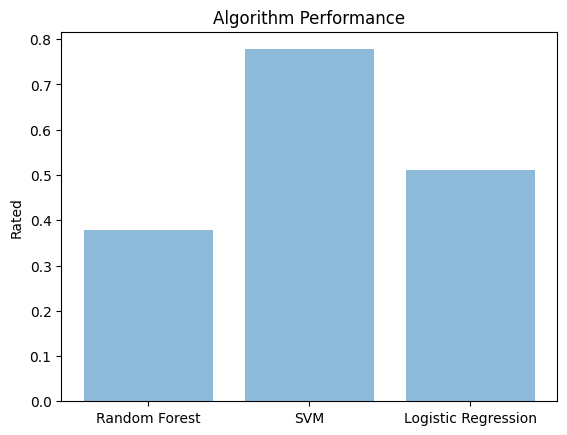

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()

import numpy as np

import matplotlib.pyplot as plt

objects = ('Random Forest','SVM','Logistic Regression')

y_pos = np.arange(len(objects))

performance = [rf_acc,ac,lr_acc]

plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)

plt.ylabel('Rated')

plt.title('Algorithm Performance')

plt.show()
